In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Arrays

In [158]:
a1 = np.array([4,6,8,2])
a2 = np.zeros(10)
a3 = np.ones(4)
a4 = np.random.random(10)
a5 = np.random.randn(10)
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.02)

# Array Operations

In [159]:
2 * a1

array([ 8, 12, 16,  4])

In [160]:
(1 / a1) + a1 + 1

array([5.25      , 7.16666667, 9.125     , 3.5       ])

In [161]:
x = np.linspace(0, 1, 100)

In [162]:
y = x ** 2

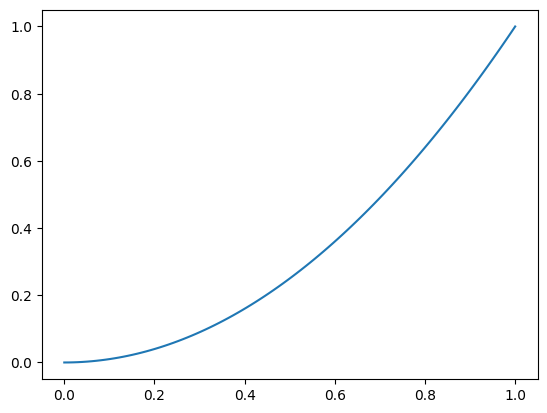

In [163]:
plt.plot(x, y)

(array([1., 1., 1., 0., 0., 2., 1., 1., 1., 2.]),
 array([0.06667303, 0.14206301, 0.21745299, 0.29284297, 0.36823295,
        0.44362293, 0.51901291, 0.59440289, 0.66979287, 0.74518285,
        0.82057283]),
 <BarContainer object of 10 artists>)

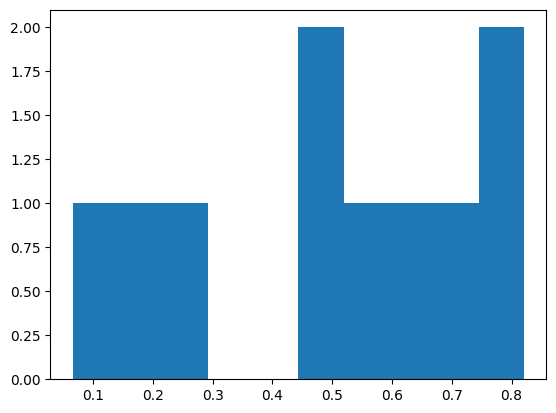

In [164]:
plt.hist(a4)

In [165]:
def f(x):
    return (x ** 2) * (np.sin(x) / np.exp(-x))

x = np.linspace(0, 10, 100)
y = f(x)

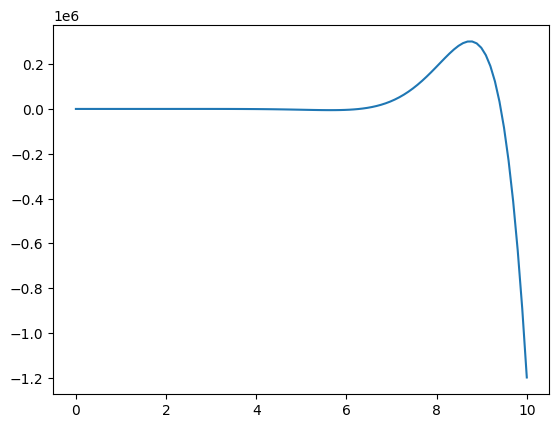

In [166]:
plt.plot(x, y)

List of mathematical functions in NumPy:

https://numpy.org/doc/stable/reference/routines.math.html

# Array Indexing / Slicing

In [167]:
a1 = np.array([2, 4, 6, 8, 10])

In [168]:
a1[2]

np.int64(6)

In [169]:
a1[2:]

array([ 6,  8, 10])

In [170]:
a1[:-2]

array([2, 4, 6])

In [171]:
a1[1:-2]

array([4, 6])

In [172]:
a1[a1 > 3]

array([ 4,  6,  8, 10])

In [173]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])
first_letter_j = np.vectorize(lambda s: s[0])(names) == 'J'
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

In [174]:
a1

array([ 2,  4,  6,  8, 10])

In [175]:
a1[a1 % 4 == 0]

array([4, 8])

# Calculus / Statistical Functions

In [176]:
a1 = 2 * np.random.randn(10000) + 10

In [177]:
a1

array([13.73599282, 11.23184767,  9.61210166, ..., 14.89847781,
       14.6104173 ,  8.99828135], shape=(10000,))

Mean, standard deviation, and percentiles of arrays:

In [178]:
np.mean(a1)

np.float64(9.967704645307629)

In [179]:
np.std(a1)

np.float64(2.0029889747859593)

In [180]:
np.percentile(a1, 80)

np.float64(11.668950524027744)

Integrals and derivatives

In [181]:
x = np.linspace(1, 10, 100)
y = (1 / (x ** 2)) * np.sin(x)
dydx = np.gradient(y, x)
y_integral = np.cumsum(y) * (x[1]-x[0])

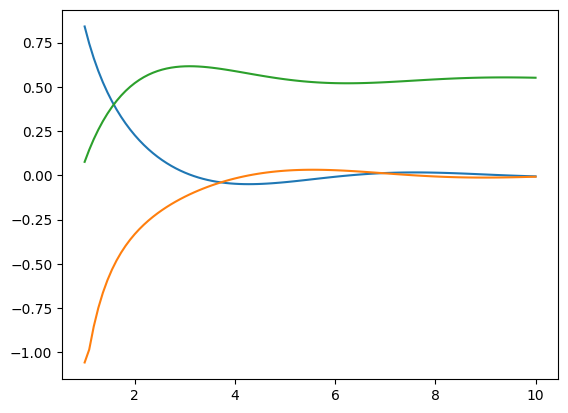

In [182]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_integral)

# Examples

# Question 1:

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$. 
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$

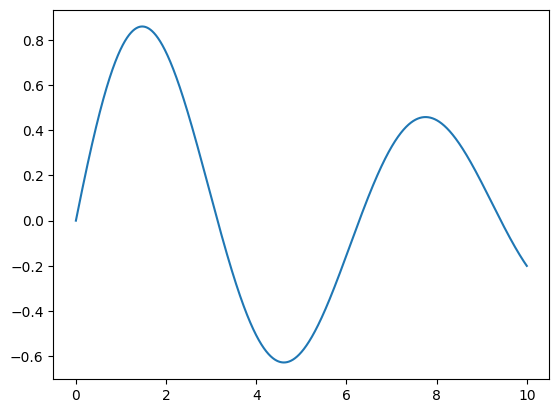

In [183]:
#1

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

plt.plot(x, y)

In [184]:
#2

x = np.linspace(4, 7, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

print(f'Mean: {np.mean(y)}')
print(f'Standard Deviation: {np.std(y)}')



Mean: -0.29565016986238374
Standard Deviation: 0.3144441774481138


In [185]:
#3

x = np.linspace(4, 7, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

print(f'80% of y values are less than {np.percentile(y, 80)}')


80% of y values are less than 0.06145551155327522


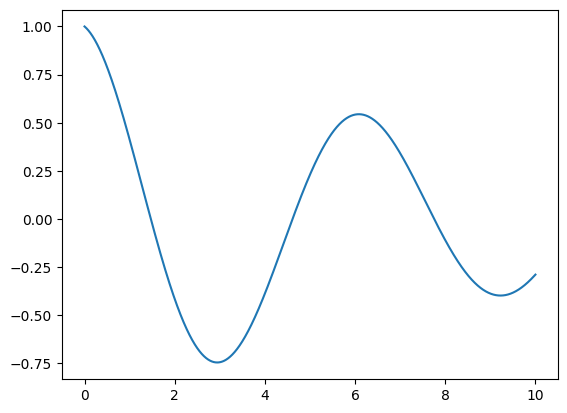

In [186]:
#4

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

dydx = np.gradient(y, x)

plt.plot(x, dydx)


In [187]:
#5

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

dydx = np.gradient(y, x)
zero_value_indices = []

for n in range(np.size(x)):
    if dydx[n - 1] * dydx[n] < 0:
        zero_value_indices.append(n)

zero_value_array = np.array(zero_value_indices)
zero_value_array = x[zero_value_array]
print(zero_value_array[1:])

[1.47114711 4.61346135 7.75477548]


More efficient way of doing #5:

In [188]:
#5

x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.47114711, 4.61346135, 7.75477548])

## Question 2:

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this in one line of code.

In [189]:
nums = np.arange(0, 10001, 1)
nums[(nums % 4 != 0) * (nums % 7 != 0)].sum()

np.int64(32147142)

## Question 3:

Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Compute the arclength using the calculus formula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

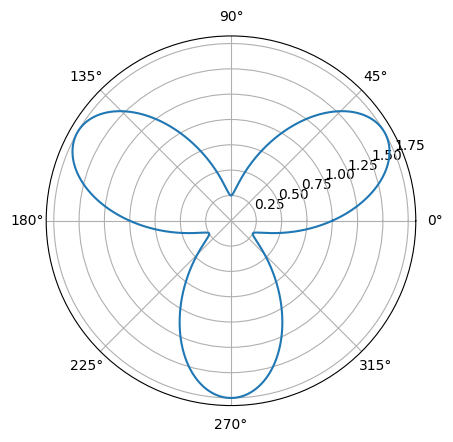

In [190]:
#1

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

plt.polar(theta_array, radius_array)


In [191]:
#2

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

area = sum(((1 /2) * (radius_array ** 2)) * (theta_array[1] - theta_array[0]))
print(f'Area = {area}')


Area = 4.02519700365261


In [192]:
#3

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

drdtheta = np.gradient(radius_array, theta_array)
arc_length = sum(np.sqrt((radius_array ** 2) + (drdtheta ** 2)) * (theta_array[1] - theta_array[0]))
print(f'Arc Length = {arc_length}')

Arc Length = 11.625143180659796


## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t} P(t') dt' $

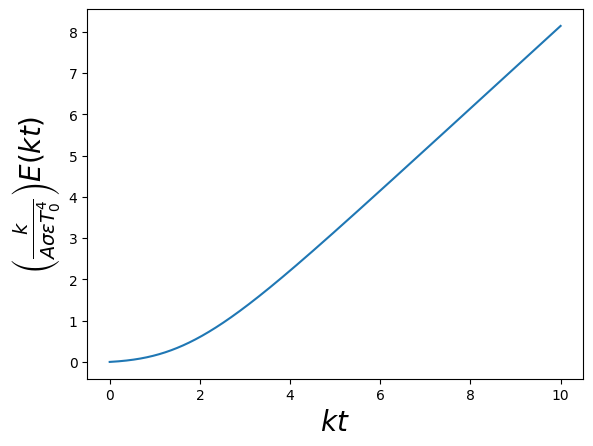

In [193]:
kt_array = np.linspace(0, 10, 100000)
energy_array = np.cumsum((1 / (1 + np.exp(-kt_array))) ** 4) * (kt_array[1] - kt_array[0])

plt.plot(kt_array, energy_array)
plt.xlabel('$kt$', fontsize=20)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0^4}\right) E(kt)$', fontsize=20)
plt.show()

# Multi-Dimensional Arrays

Creating multi-dimensional arrays

In [194]:
a1 = np.array([[4, 6, 4], [1, 2, 2], [6, 8, 7]])

Operations work in a similar way

In [195]:
print(2 / a1)

[[0.5        0.33333333 0.5       ]
 [2.         1.         1.        ]
 [0.33333333 0.25       0.28571429]]


Can turn any n-dimensional array to a 1d array using ravel() method

In [196]:
print(a1.ravel())

[4 6 4 1 2 2 6 8 7]


Boolean indexing

In [197]:
print(a1 > 5)

[[False  True False]
 [False False False]
 [ True  True  True]]


In [198]:
a2 = np.random.randn(3, 3)
print(a2)

[[ 0.3535133   1.70851368 -0.53795801]
 [-0.59257115 -0.8260644  -0.43950221]
 [-0.42843371 -0.28119815  0.29997333]]


In [199]:
a2[a1 > 5]

array([ 1.70851368, -0.42843371, -0.28119815,  0.29997333])

Element indexing

In [200]:
a1

array([[4, 6, 4],
       [1, 2, 2],
       [6, 8, 7]])

In [201]:
a1[1:,:2]

array([[1, 2],
       [6, 8]])

# Dealing with 2D Functions

Function in 2 dimensions? Try this...

In [202]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

Need to use meshgrids

In [203]:
xv, yv = np.meshgrid(x, y)

In [204]:
zv = xv ** 2 + yv ** 2

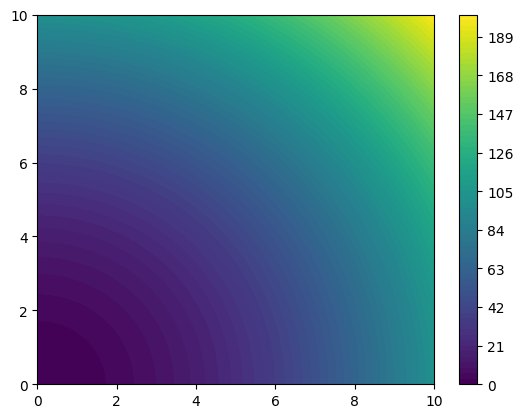

In [205]:
plt.contourf(xv, yv, zv, levels = 70)
plt.colorbar()

# Basic Linear Algebra

# Matrix Operations

In [206]:
A = np.array([[3, 2, 1], [5, -5, 4], [6, 0, 1]])
b1 = np.array([1, 2, 3])
b2 = np.array([-1, 2, -5])

In [207]:
A@b1

array([10,  7,  9])

In [208]:
A

array([[ 3,  2,  1],
       [ 5, -5,  4],
       [ 6,  0,  1]])

In [209]:
A.T

array([[ 3,  5,  6],
       [ 2, -5,  0],
       [ 1,  4,  1]])

In [210]:
np.dot(b1, b2)

np.int64(-12)

In [211]:
np.cross(b1, b2)

array([-16,   2,   4])

# Systems of Equations

$ 3x + 2y + z = 4$

$ 5x -5y + 4z = 3$

$ 6x +z = 0$

In [212]:
A = np.array([[3, 2, 1], [5, -5, 4], [6, 0, 1]])
C = np.array([4, 3, 0])

In [213]:
np.linalg.solve(A, C)

array([-0.49056604,  1.26415094,  2.94339623])

# Finding Eigenvalues

In [214]:
A = np.array([[4, 2, 2], [2, 4, 2], [2, 2, 4]])
np.linalg.eig(A)

EigResult(eigenvalues=array([2., 8., 2.]), eigenvectors=array([[-0.81649658,  0.57735027,  0.50669854],
       [ 0.40824829,  0.57735027, -0.80782419],
       [ 0.40824829,  0.57735027,  0.30112565]]))

In [215]:
w, v = np.linalg.eig(A)

In [216]:
v1 = v[:,0]
v1

array([-0.81649658,  0.40824829,  0.40824829])

In [217]:
A@v1

array([-1.63299316,  0.81649658,  0.81649658])

In [218]:
w[0] * v1

array([-1.63299316,  0.81649658,  0.81649658])

# Examples

# Question 1

Let $f(x,y) = e^{-(x^2+y^2)} \cdot \sin(x)$ for $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

1. Make a contour plot of $f$
2. Find the volume $|f(x,y)|$ in the specified $x$ and $y$ range
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt{x^2+y^2}>0.5$ 

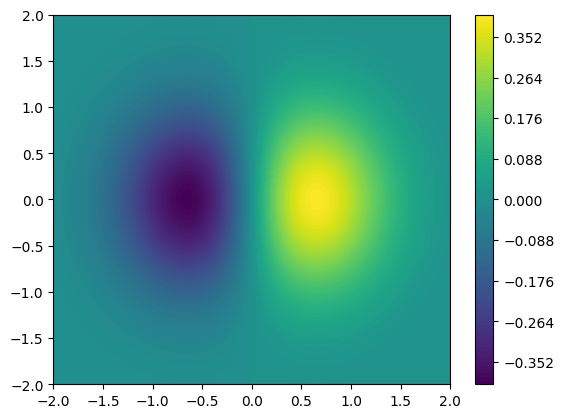

In [219]:
# 1

x_array = np.linspace(-2, 2, 1000)
y_array = np.linspace(-2, 2, 1000)
x_mesh, y_mesh = np.meshgrid(x_array, y_array)
z_mesh = np.exp(-(x_mesh**2+y_mesh**2)) * np.sin(x_mesh)

plt.contourf(x_mesh, y_mesh, z_mesh, levels = 100)
plt.colorbar()

In [220]:
# 2

x_array = np.linspace(-2, 2, 1000)
y_array = np.linspace(-2, 2, 1000)
x_mesh, y_mesh = np.meshgrid(x_array, y_array)
z_mesh = np.exp(-(x_mesh**2+y_mesh**2)) * np.abs(np.sin(x_mesh))
volume = z_mesh.sum() * (np.diff(x_array)[0]) * (np.diff(y_array)[0])
print(volume)


1.4861858145124311


In [221]:
# 3

x_array = np.linspace(-2, 2, 1000)
y_array = np.linspace(-2, 2, 1000)
x_mesh, y_mesh = np.meshgrid(x_array, y_array)
z_mesh = np.exp(-(x_mesh**2+y_mesh**2)) * np.abs(np.sin(x_mesh))
total_volume = z_mesh.sum() * (np.diff(x_array)[0]) * (np.diff(y_array)[0])

mask = (x_mesh**2) + (y_mesh**2) < 0.25
volume_in = (z_mesh * mask).sum() * (np.diff(x_array)[0]) * (np.diff(y_array)[0])
volume_out = total_volume - volume_in
print(volume_out)


1.3447652930203169


## Question 2

After examining a circuit full of resistors, you find that the voltage at 4 specified points is given by

$ 3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$

$ 2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$

$ 3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$

$ 3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$

Find all the voltages

In [222]:
system_coefficients = np.array([[3, 2, 3, 10], [2, -2, 5, 8], [3, 3, 4, 9], [3, 4, -3, -7]])
equation_solutions = np.array([4, 1, 3, 2])
np.linalg.solve(system_coefficients, equation_solutions)

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

## Question 3 (tougher)

An electric field is given by $\vec{E}(z,t) = E_0 \cos (z-t) \hat{x} + 2E_0 \cos(z-t+\pi/2) \hat{y}$. 

1. Find the magnetic field for all $z \in [0,4\pi]$ and $t \in [0,10]$ using $c\vec{B}(z,t) = \hat{z} \times \vec{E}(z,t)$
2. Compute the Poynting vector $\vec{S} = \vec{E} \times \vec{B}$ for all $z$ and $t$

In [223]:
z = np.linspace(0, 4*np.pi, 1000)
t = np.linspace(0, 10, 1000)

t_mesh, z_mesh = np.meshgrid(t, z)

Ex = np.cos(z_mesh - t_mesh)
Ey = 2 * np.cos(z_mesh - t_mesh + np.pi / 2)
Ez = 0 * t_mesh

$E_x$ as function of $t$ at $z = 0$

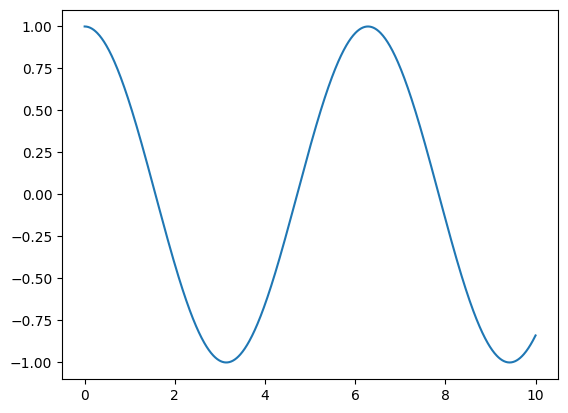

In [224]:
plt.plot(t, Ex[0])

$E_x$ as function of $t$ at $z = 0$

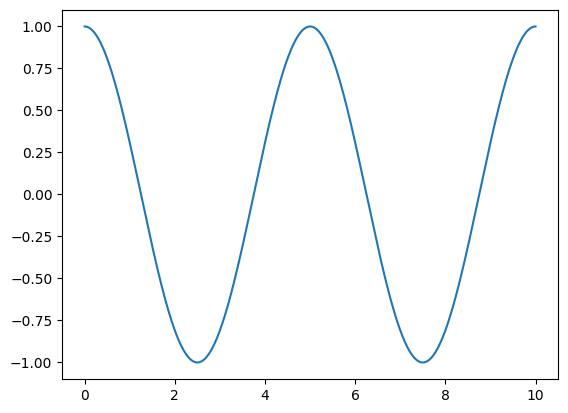

In [225]:
plt.plot(t, Ex[:,0])

In [226]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)

In [227]:
B = np.cross(np.array([0, 0, 1]), E)
B = np.swapaxes(B, 0, -1)

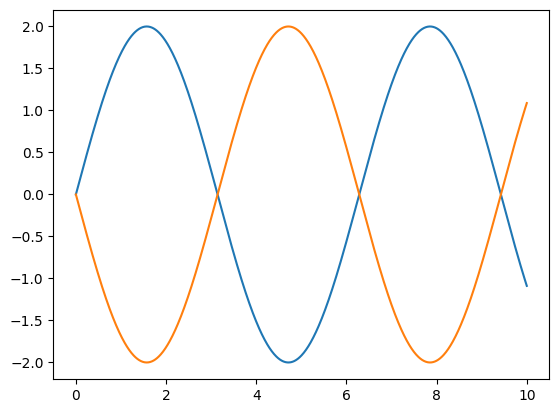

In [228]:
Bx, By, Bz = B
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])

In [ ]:
B = np.swapaxes(B, 0, -1)

In [234]:
# 3
S = np.cross(E, B)
S = np.swapaxes(S, 0, -1)

In [236]:
Sx, Sy, Sz = S

In [237]:
Sx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 1000))

## Question 4 (tougher)

Find the solutions to $\left(\frac{d^2}{dx^2} + (10x)^2\right) f = \lambda f$ with boundary conditions $f(0)=f(1)=0$

* use the eigenvalue method and the fact that $\frac{d^2 f}{dx^2} \approx \frac{f_{i+1} + f_{i-1} - 2f_i}{\Delta x^2}$ where $f_i = f(i \Delta x)$ and $i$ is an integer. 

In [239]:
N = 1000
x = np.linspace(0, 1, N+1)
dx = x[1] - x[0]

In [245]:
main_diag = -2 * np.ones(N - 1)
off_diag = np.ones(N - 2)
derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, -1) + np.diag(off_diag, 1)) / (dx ** 2)
x2_matrix = np.diag((10 * x[1:-1]) ** 2)
LHS_matrix = derivative_matrix + x2_matrix

In [247]:
w, v = np.linalg.eigh(LHS_matrix)

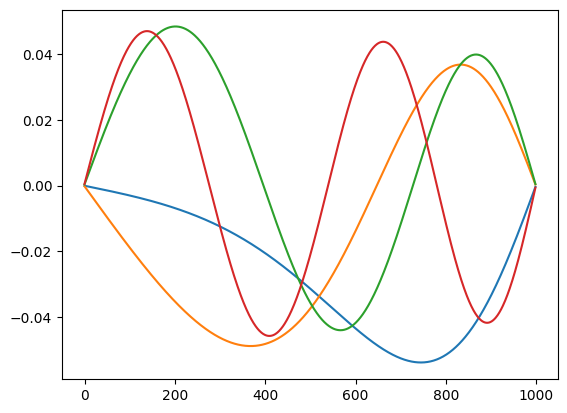

In [249]:
plt.plot(v[:,-1])
plt.plot(v[:,-2])
plt.plot(v[:,-3])
plt.plot(v[:,-4])

In [250]:
w[-1]

np.float64(29.855323222430606)

In [251]:
w[-2]

np.float64(-10.80610865395339)

In [252]:
w[-3]

np.float64(-58.10082372779287)

# Basic Datasets

In [269]:
rows, names, heights = np.loadtxt('sample.csv', dtype = 'object', delimiter = ',', unpack = True, skiprows = 1)

In [270]:
names = names.astype(str)

In [271]:
names

array(['Jim', 'Mike', 'Bob', 'Susy', 'Tim', 'Frank'], dtype='<U5')

In [272]:
heights = heights.astype(float)

In [273]:
heights

array([172., 168., 182., 156., 170., 190.])